# Topicos de estudo para a AI

## Fases de um projeto de machine learning versus etapas do CRISP-DM

<img src="crisp.png" width=80%/>

## Análise Exploratória

- O que fazer **antes** da separação treino-teste e o que fazer **depois**

    - Antes: analise da natureza global das variaveis, independentemente uma das outras

        - Só coisa "ingênua", que não leva diretamente a construção de modelos

        - Análise de anomalias: valores faltantes, outliers, erros grosseiros

        - Variáveis contínuas:
        
            - Medidas descritivas (média, mediana, desvio padrão, etc)

            - Histogramas

        - Variáveis categóricas:

            - Frequências (`value_counts`)

    - Separação treino-teste:

        - Nada especial, só lembre de fixar o `random_state`

            > ```Python
            > 
            > from sklearn.model_selection import train_test_split
            > 
            > SEED = 42
            > 
            > X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
            > 
            > ```

    - Depois: tá liberado, mas só no conjunto de treino

        - Analisar dependencias entre variaveis, e entre elas e o target

        - Contínua versus contínua:

            - Medidas de correlação (Pearson, Spearman, Kendall)

            - Gráficos de espalhamento (*scatter plots*)

        - Categórica versus categórica

            - Teste de independencia: teste qui-quadrado de Pearson (*chi-square*). **Não foi visto em aula, não se preocupe.**

            - Tabela de contingência (`cross_tab`)

        - Categórica versus contínua

            - Boxplot da contínua para cada categoria

            - Teste de Kolmogorov-Smirnov entre valores da variável contínua para pares de categorias. **Não foi visto em aula, não se preocupe.**


In [1]:
from sklearn.datasets import load_wine

data = load_wine(as_frame=True)
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [2]:
dataset = data.data
dataset['target'] = data.target.astype('category')

dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   alcohol                       178 non-null    float64 
 1   malic_acid                    178 non-null    float64 
 2   ash                           178 non-null    float64 
 3   alcalinity_of_ash             178 non-null    float64 
 4   magnesium                     178 non-null    float64 
 5   total_phenols                 178 non-null    float64 
 6   flavanoids                    178 non-null    float64 
 7   nonflavanoid_phenols          178 non-null    float64 
 8   proanthocyanins               178 non-null    float64 
 9   color_intensity               178 non-null    float64 
 10  hue                           178 non-null    float64 
 11  od280/od315_of_diluted_wines  178 non-null    float64 
 12  proline                       178 non-null    floa

In [4]:
dataset \
    .select_dtypes(include='float64') \
    .describe() \
    .round(2) \
    .transpose()

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.00,0.81,11.03,12.36,13.05,13.68,14.83
malic_acid,178.0,2.34,1.12,0.74,1.60,1.87,3.08,5.80
ash,178.0,2.37,0.27,1.36,2.21,2.36,2.56,3.23
alcalinity_of_ash,178.0,19.49,3.34,10.60,17.20,19.50,21.50,30.00
magnesium,178.0,99.74,14.28,70.00,88.00,98.00,107.00,162.00
total_phenols,178.0,2.30,0.63,0.98,1.74,2.36,2.80,3.88
flavanoids,178.0,2.03,1.00,0.34,1.20,2.13,2.88,5.08
nonflavanoid_phenols,178.0,0.36,0.12,0.13,0.27,0.34,0.44,0.66
proanthocyanins,178.0,1.59,0.57,0.41,1.25,1.56,1.95,3.58
color_intensity,178.0,5.06,2.32,1.28,3.22,4.69,6.20,13.00


In [5]:
dataset \
    .select_dtypes(include='category') \
    .describe()

,target
count,178
unique,3
top,1
freq,71


In [6]:
dataset['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [7]:
dataset['target'].value_counts(normalize=True).round(2)

target
1    0.40
0    0.33
2    0.27
Name: proportion, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

SEED = 42

dataset_train, dataset_test = train_test_split(
    dataset,
    test_size=0.2,
    random_state=SEED,
)

In [9]:
dataset.shape, dataset_train.shape, dataset_test.shape

((178, 14), (142, 14), (36, 14))

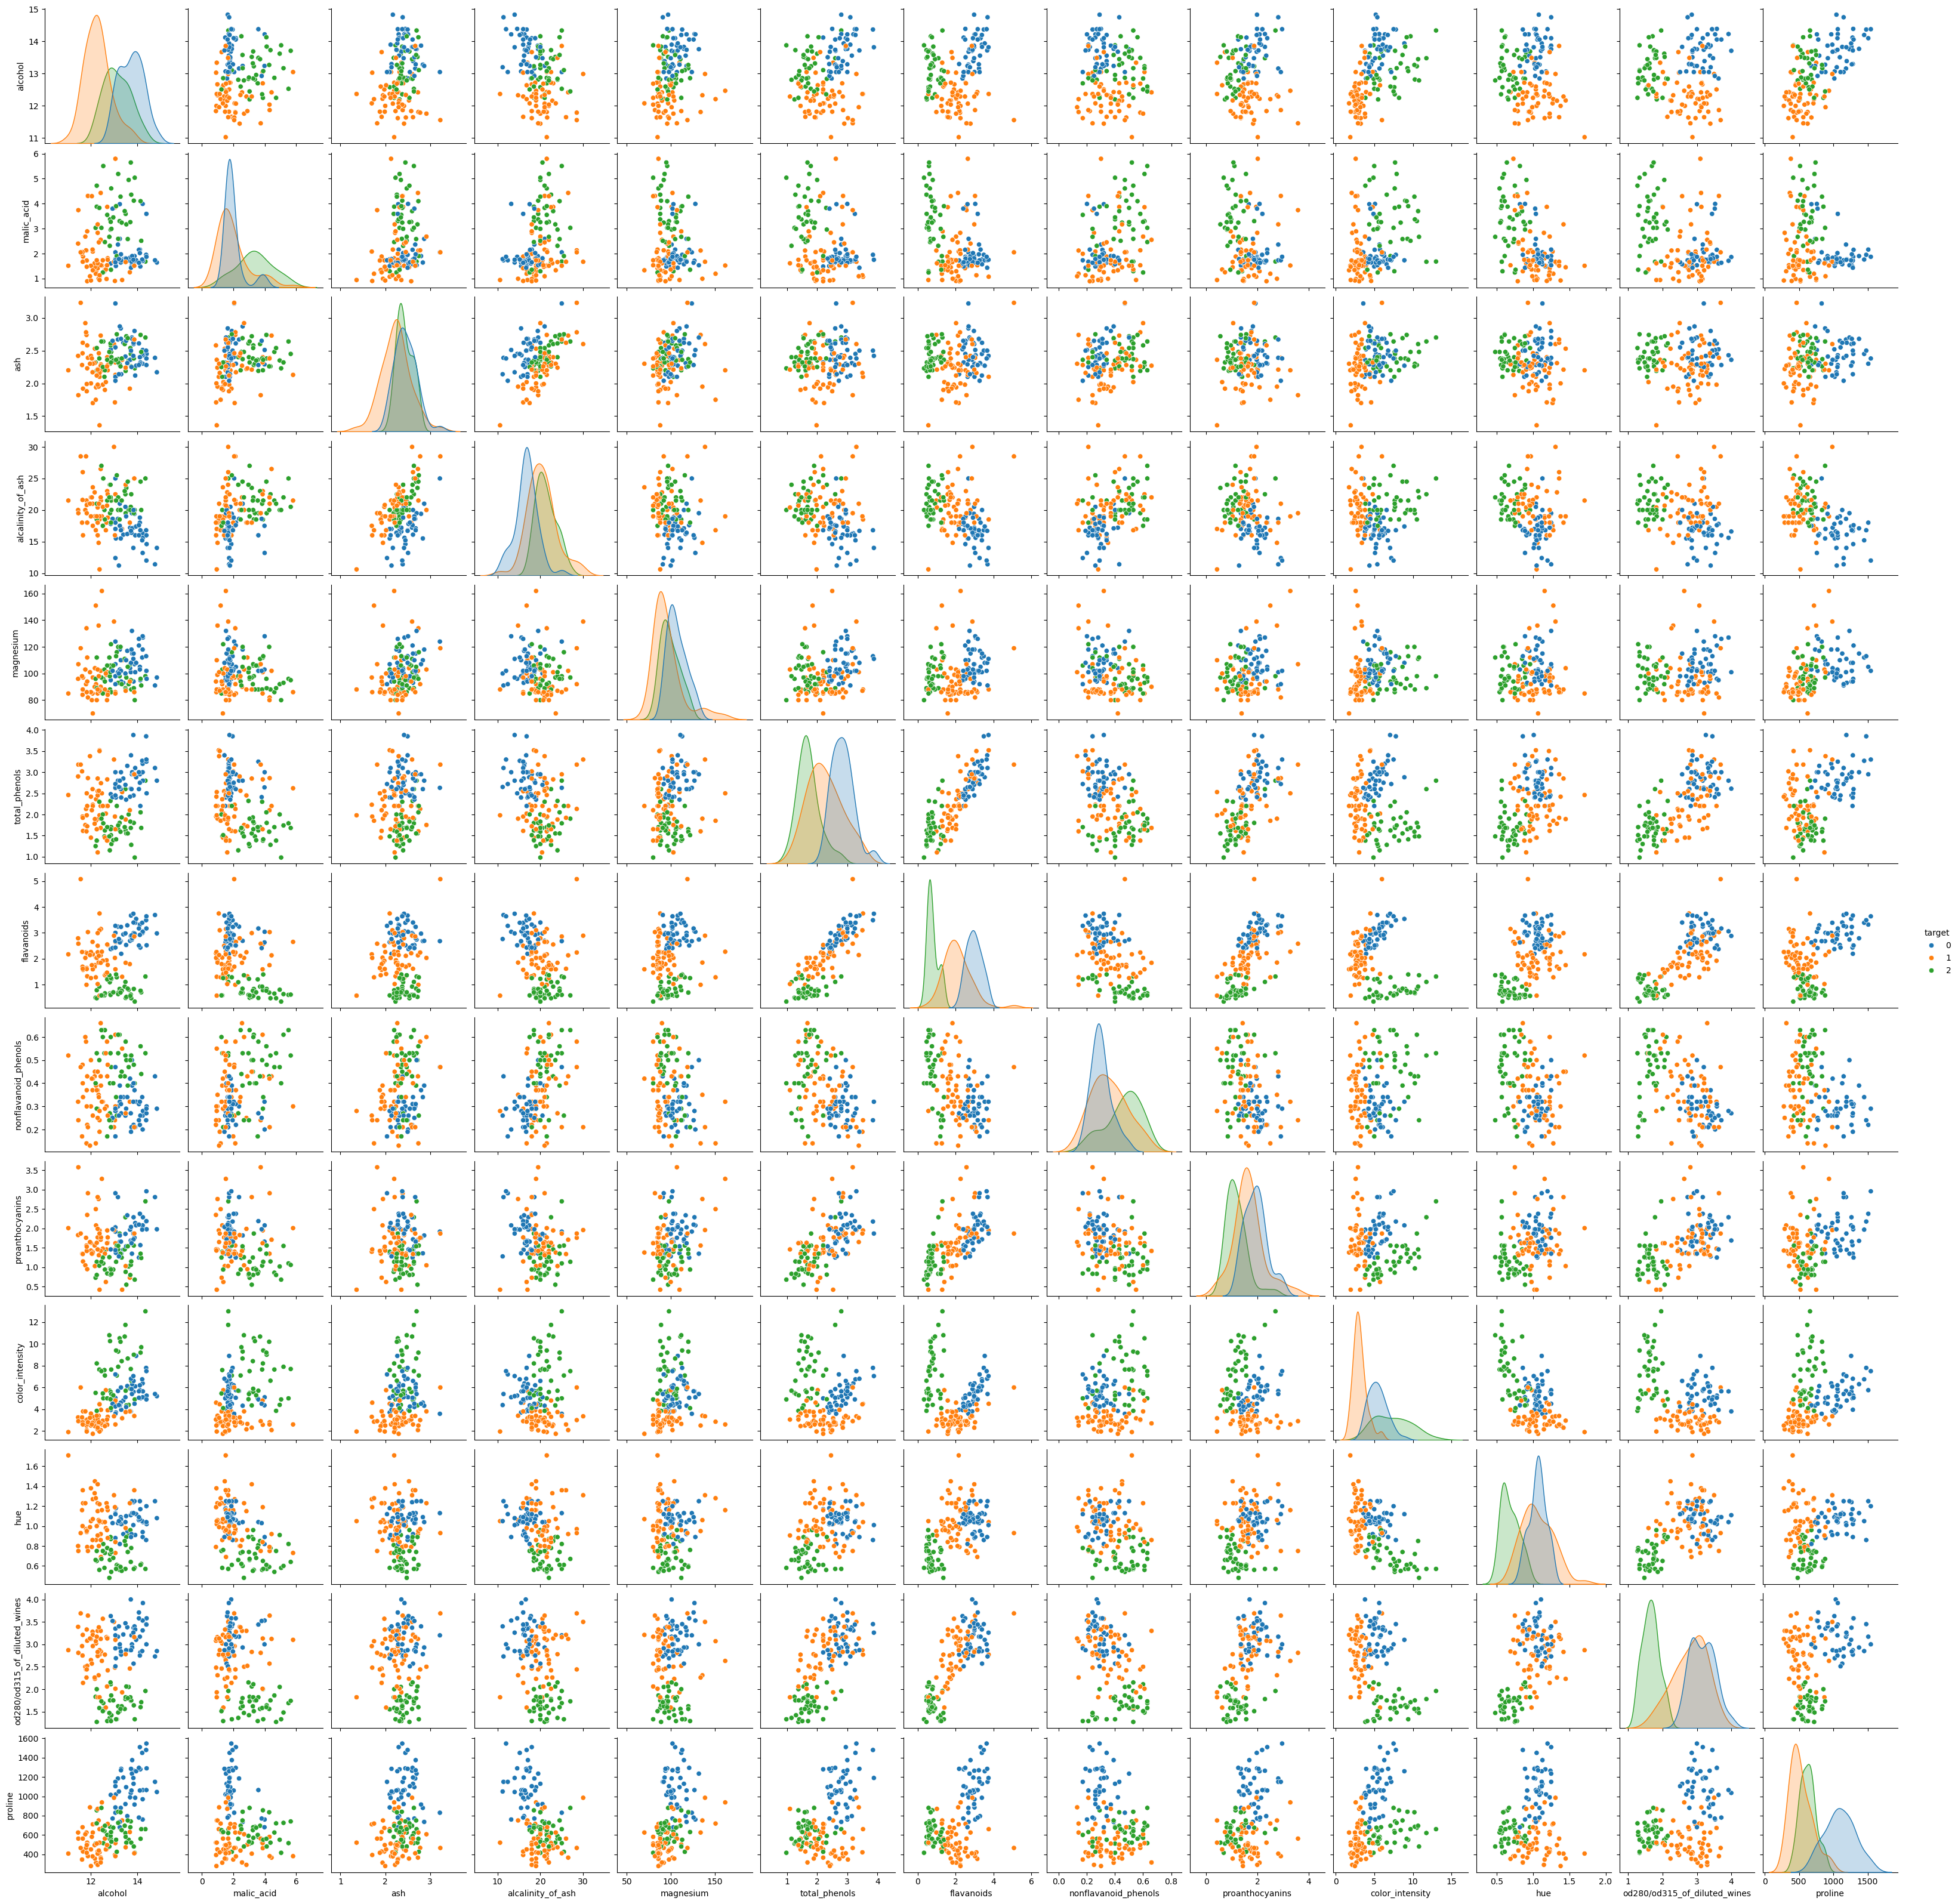

In [10]:
import seaborn

seaborn.pairplot(dataset_train, hue='target')

## Pipelines

### Transformadores

<img src="transformadores.png" width=70%/>

In [11]:
from sklearn.preprocessing import StandardScaler

# Exemplo de transformador
X_train = dataset_train.drop(columns='target')
y_train = dataset_train['target']

X_test = dataset_test.drop(columns='target')
y_test = dataset_test['target']

X_train.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
alcohol,142.0,12.98,0.82,11.03,12.33,13.01,13.68,14.83
malic_acid,142.0,2.37,1.14,0.89,1.62,1.88,3.14,5.80
ash,142.0,2.36,0.28,1.36,2.21,2.36,2.54,3.23
alcalinity_of_ash,142.0,19.47,3.45,10.60,17.20,19.20,21.50,30.00
magnesium,142.0,100.44,14.65,70.00,88.25,98.00,107.00,162.00
total_phenols,142.0,2.29,0.64,0.98,1.72,2.31,2.80,3.88
flavanoids,142.0,2.00,1.00,0.34,1.12,2.08,2.84,5.08
nonflavanoid_phenols,142.0,0.37,0.13,0.13,0.27,0.34,0.47,0.66
proanthocyanins,142.0,1.61,0.58,0.42,1.25,1.56,1.97,3.58
color_intensity,142.0,5.06,2.33,1.74,3.22,4.60,6.12,13.00


In [12]:
import pandas as pd

# Cria o transformador.
scaler = StandardScaler()

# Treina o transformador.
scaler.fit(X_train)

# Aplica o transformador.
X_train_scaled = scaler.transform(X_train)

X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index,
)

X_train_scaled.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
alcohol,142.0,-0.0,1.0,-2.39,-0.79,0.04,0.85,2.26
malic_acid,142.0,0.0,1.0,-1.30,-0.67,-0.44,0.67,3.01
ash,142.0,-0.0,1.0,-3.60,-0.54,-0.00,0.64,3.12
alcalinity_of_ash,142.0,0.0,1.0,-2.58,-0.66,-0.08,0.59,3.06
magnesium,142.0,-0.0,1.0,-2.09,-0.84,-0.17,0.45,4.22
total_phenols,142.0,0.0,1.0,-2.06,-0.89,0.03,0.80,2.50
flavanoids,142.0,0.0,1.0,-1.66,-0.88,0.07,0.84,3.08
nonflavanoid_phenols,142.0,0.0,1.0,-1.86,-0.77,-0.22,0.80,2.28
proanthocyanins,142.0,-0.0,1.0,-2.04,-0.62,-0.09,0.62,3.39
color_intensity,142.0,-0.0,1.0,-1.43,-0.79,-0.20,0.46,3.42


In [13]:
# Fazendo coisa proibida só para ilustrar o StandardScaler.
# Isso é proibido AGORA, antes da modelagem. Mas DEPOIS da escolha de modelo,
# pode ser feito sem problemas.
X_test.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
alcohol,36.0,13.09,0.78,11.41,12.37,13.38,13.66,14.30
malic_acid,36.0,2.19,1.01,0.74,1.47,1.81,2.88,4.60
ash,36.0,2.39,0.26,1.70,2.26,2.42,2.57,2.86
alcalinity_of_ash,36.0,19.58,2.88,15.00,17.02,19.80,21.25,25.00
magnesium,36.0,96.97,12.53,78.00,88.00,96.00,106.50,123.00
total_phenols,36.0,2.32,0.58,1.35,1.94,2.46,2.81,3.30
flavanoids,36.0,2.14,0.98,0.50,1.44,2.31,2.91,3.93
nonflavanoid_phenols,36.0,0.34,0.11,0.17,0.27,0.31,0.41,0.63
proanthocyanins,36.0,1.52,0.53,0.41,1.19,1.54,1.88,2.49
color_intensity,36.0,5.06,2.30,1.28,3.22,4.90,6.41,9.90


In [14]:
X_test_scaled = scaler.transform(X_test)

X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_test.columns,
    index=X_test.index,
)

X_test_scaled.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
alcohol,36.0,0.13,0.96,-1.92,-0.75,0.49,0.84,1.62
malic_acid,36.0,-0.16,0.88,-1.43,-0.79,-0.49,0.45,1.95
ash,36.0,0.10,0.92,-2.38,-0.38,0.23,0.74,1.79
alcalinity_of_ash,36.0,0.03,0.84,-1.30,-0.71,0.09,0.52,1.61
magnesium,36.0,-0.24,0.86,-1.54,-0.85,-0.30,0.41,1.55
total_phenols,36.0,0.05,0.92,-1.48,-0.56,0.28,0.82,1.59
flavanoids,36.0,0.13,0.98,-1.50,-0.56,0.31,0.91,1.93
nonflavanoid_phenols,36.0,-0.24,0.83,-1.55,-0.79,-0.45,0.35,2.05
proanthocyanins,36.0,-0.15,0.91,-2.06,-0.71,-0.11,0.46,1.52
color_intensity,36.0,0.00,0.99,-1.63,-0.79,-0.07,0.58,2.08


### Pipelines de transformação de dados

<img src="pipeline.png" width=70%/>

Para quem olha "de fora", uma *pipeline* se parece com um transformador e nada mais! Podemos treiná-lo com o método `fit`:

<img src="pipeline_transform_train.png" width=50%/>

E o que acontece "por trás das cortinas"? Deixa que o *Scikit-Learn* cuida de tudo para você! Mas, para nosso entendimento, eis o que acontece:

<img src="pipeline_transform_train_internals.png" width=50%/>

Agora que o pipeline está treinado, podemos usá-lo para fazer transformações de dados, como um transformer qualquer!

<img src="pipeline_transform_apply.png" width=50%>

E, por dentro, o que acontece? O *Scikit-Learn* vai chamar cada transformador, um por vez, em sequência:

<img src="pipeline_transform_apply_internals.png" width=50%/>

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Cria a pipeline.
pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
])

pipe

Pipeline(steps=[('imputer', SimpleImputer()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler())])

In [16]:
# Treina a pipeline.
pipe.fit(X_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler())])

In [17]:
X_train_transformed = pipe.transform(X_train)

In [18]:
X_train.shape, X_train_transformed.shape

((142, 13), (142, 104))

In [19]:
# Colunas na saida do PolynomialFeatures(degree=2, include_bias=False)

# Colunas de grau 1: as 13 features originais.
n_deg_1 = 13

# Colunas de grau 2 com features diferentes: 
# combinações de 2 features originais.
n_deg_2_diff = 13 * (13 - 1) // 2  # 13 escolha 2

# Colunas de grau 2 com features iguais:
# cada coluna original ao quadrado.
n_deg_2_same = 13

n_cols_total = n_deg_1 + n_deg_2_diff + n_deg_2_same

n_cols_total

104

### Pipelines preditoras

Toda *pipeline* é feita de uma sequência de estágios *transformadores*, e o último estágio pode ser um *transformador* ou um *modelo preditivo*.

- ***Pipeline*** **transformadora**:

Quando o último estágio é um *transformador* (como no exemplo anterior), a *pipeline* atua como um *transformador*

- ***Pipeline*** **preditora**:

Quando o último estágio é um *modelo preditivo*, a *pipeline* atua como um *modelo preditivo*

<img src="pipeline_predict.png" width=70%/> 

Treinamos a *pipeline* preditora do mesmo jeito que treinamos modelos:

<img src="pipeline_predict_train.png" width=50%>

"Por trás dos panos":

<img src="pipeline_predict_train_internals.png" width=80%>

Para fazer predições, use como se fosse um modelo qualquer!

<img src="pipeline_predict_apply.png" width=50%/>

Novamente, o que acontece "por dentro":

<img src="pipeline_predict_apply_internals.png" width=90%/>

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Cria a pipeline.
pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000)),
])

pipe

Pipeline(steps=[('imputer', SimpleImputer()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('classifier', LogisticRegression(max_iter=1000))])

In [21]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('classifier', LogisticRegression(max_iter=1000))])

In [22]:
from sklearn.metrics import classification_report

# Usando ILEGALMENTE ( :D ) o pipe para prever nos dados de teste.
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### `ColumnTransformer`, `Pipeline` e transformadores

> ```Python
> geo_cols = [
>     'longitude',
>     'latitude',
> ]
> 
> numerical_cols = [
>     'housing_median_age',
>     'log_households',
>     'log_median_income',
>     'log_rooms_per_household',
>     'log_population_per_household',
>     'log_bedrooms_per_room',
> ]
> 
> categorical_cols = [
>     'ocean_proximity',
> ]
> 
> geo_pipeline = Pipeline([
>     ('imputer', SimpleImputer(strategy='median')),
>     ('cluster', KMeans(n_clusters=50)),
> ])
> 
> num_pipeline = Pipeline([
>     ('imputer', SimpleImputer(strategy='median')),
>     ('poly', PolynomialFeatures(degree=3, include_bias=False)),
>     ('scaler', StandardScaler()),
> ])
> 
> cat_pipeline = Pipeline([
>     ('encoder', OneHotEncoder(sparse_output=False)),
> ])
> 
> preprocessing_pipe = ColumnTransformer(
>     transformers=[
>         ('geo', geo_pipeline, geo_cols),
>         ('num', num_pipeline, numerical_cols),
>         ('cat', cat_pipeline, categorical_cols),
>     ],
>     remainder='passthrough',
> )
> ```

<img src="column_transformer.png" width=100%/>

## Comparação de modelos

In [29]:
dataset = pd.read_csv('housing.csv')

SEED = 42

train_dataset, test_dataset = train_test_split(
    dataset,
    test_size=0.2,
    random_state=SEED,
)

X_train = train_dataset.drop(columns='median_house_value')
y_train = train_dataset['median_house_value']

X_test = test_dataset.drop(columns='median_house_value')
y_test = test_dataset['median_house_value']

### Versão simples: train-test-val split

### Versão mais sofisticada: validação cruzada

## Ajuste de hiperparâmetros

- `GridSearchCV`

## Regressão

- Medidas de desempenho: MSE, RMSE

- Análise de erros:

    - Resíduos

- Modelo trivial

## Classificação

- Classificação binária e multiclasse

    - Classificador trivial

De resto, só classificação binária.

- Medidas de desempenho:

    - acurácia

    - Precision e recall

        - trade-off precision vs. recall

        - Curva precision-recall, `cross_val_predict`

        - métrica F1

    - Sensibility e specificity

        - trade-off sensibility vs. specificity

        - Curva ROC, área sob a curva ROC (AUC ou AUROC)

## Modelo linear

- Definição

- Explicação intuitiva de porque não podemos ter *features colineares*